# PROYECTO FINAL



Este proyecto tiene como propósito encontrar a los operadores menos eficaces dentro de una red de telecomunicaciones.



DEFINICIÓN DE INEFICACIA: Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

https://drive.google.com/drive/folders/1WxXif2MJKjWhviBhZi3vcwFkF0-QwWc7?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
telecom = pd.read_csv('/datasets/telecom_dataset_us.csv')
clients = pd.read_csv('/datasets/telecom_clients_us.csv')

In [ ]:
telecom.shape


(53902, 9)

In [ ]:
clients.shape

(732, 3)

In [ ]:
telecom.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62


In [ ]:
clients.head(10)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
5,167764,A,2019-09-30
6,167050,A,2019-08-29
7,168252,A,2019-10-17
8,168495,A,2019-10-28
9,167879,A,2019-10-03


In [ ]:
telecom.isna().sum().sort_values(ascending=False)

operator_id            8172
internal                117
user_id                   0
date                      0
direction                 0
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [ ]:
clients.isna().sum().sort_values(ascending=False)

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [ ]:
clients.duplicated().sum()

0

In [ ]:
telecom.duplicated().sum()

4900

In [ ]:
duplicated = telecom[telecom.duplicated(keep=False)]
print(duplicated.head(20))

     user_id                       date direction internal  operator_id  \
6     166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
8     166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
27    166377  2019-08-12 00:00:00+03:00        in    False          NaN   
28    166377  2019-08-12 00:00:00+03:00        in    False          NaN   
38    166377  2019-08-14 00:00:00+03:00        in    False          NaN   
43    166377  2019-08-14 00:00:00+03:00       out    False     880026.0   
44    166377  2019-08-14 00:00:00+03:00       out    False     880026.0   
45    166377  2019-08-14 00:00:00+03:00        in    False          NaN   
46    166377  2019-08-15 00:00:00+03:00       out    False     880026.0   
51    166377  2019-08-15 00:00:00+03:00       out    False     880026.0   
58    166377  2019-08-19 00:00:00+03:00       out    False     880026.0   
62    166377  2019-08-19 00:00:00+03:00       out    False     880026.0   
72    166377  2019-08-22 

Se identificaron valores nulos principalmente en la columna operator_id, los cuales no representan errores de carga, sino llamadas que no fueron asignadas a un operador, como llamadas entrantes perdidas. Asimismo, se detectó una pequeña cantidad de valores faltantes en la variable internal, los cuales fueron documentados sin modificar para evitar alterar la información original. El conjunto de datos de clientes se encontró completamente limpio, sin valores nulos ni duplicados.

El análisis de duplicados en el dataset principal reveló la presencia de registros idénticos; sin embargo, tras una inspección detallada se determinó que estos corresponden a eventos agregados con las mismas características operativas, por lo que no se eliminaron para no distorsionar los resultados posteriores. Finalmente, se verificó la coherencia lógica de las métricas de duración de llamadas, confirmando que los valores son consistentes con el comportamiento esperado del negocio.

En general, los datos presentan una estructura adecuada y suficiente calidad para continuar con el análisis.

In [ ]:
telecom_1 = telecom.dropna(subset=['operator_id'])

In [ ]:
llamadas_entrantes = telecom_1[telecom_1['direction'] == 'in'].copy()

In [ ]:
perdidas = llamadas_entrantes[llamadas_entrantes['is_missed_call'] == True]
no_perdidas = llamadas_entrantes[llamadas_entrantes['is_missed_call'] == False]

In [ ]:
print(perdidas['is_missed_call'].dtype)
print(no_perdidas['is_missed_call'].dtype)

bool
bool


In [ ]:
print(perdidas.shape)
print(no_perdidas.shape)

(744, 9)
(13269, 9)


In [ ]:
perdidas_por_operador = perdidas.groupby('operator_id')['calls_count'].sum().reset_index()
perdidas_por_operador.columns = ['Operador', 'Llamadas perdidas']

print(perdidas_por_operador.sort_values(by='Llamadas perdidas', ascending=False).head())

     Operador  Llamadas perdidas
98   913942.0                 55
210  944226.0                 38
206  944216.0                 32
196  940588.0                 30
6    885890.0                 27


In [ ]:
llamadas_por_operador = llamadas_entrantes.groupby('operator_id')['calls_count'].sum().reset_index()
llamadas_por_operador.columns = ['Operador', 'Llamadas']
print(llamadas_por_operador.sort_values(by='Llamadas', ascending = False).head())

     Operador  Llamadas
288  913938.0      5221
674  952948.0      4112
289  913942.0      2641
76   893804.0      2632
358  921318.0      2485


In [ ]:
tabla_llamadas_por_operador = pd.merge(llamadas_por_operador, perdidas_por_operador, how='inner')
print(tabla_llamadas_por_operador.sort_values(by='Llamadas perdidas', ascending=False))

     Operador  Llamadas  Llamadas perdidas
98   913942.0      2641                 55
210  944226.0       202                 38
206  944216.0       288                 32
196  940588.0      2382                 30
6    885890.0      1363                 27
..        ...       ...                ...
152  932798.0       121                  1
151  932460.0        29                  1
149  930242.0         4                  1
147  929876.0        36                  1
238  969272.0       225                  1

[239 rows x 3 columns]


In [ ]:
tabla_llamadas_por_operador['PRC_Llamadas perdidas'] = round((tabla_llamadas_por_operador['Llamadas perdidas'] / tabla_llamadas_por_operador['Llamadas']) * 100, 2)

In [ ]:
tabla_llamadas_por_operador.head(10)

,Operador,Llamadas,Llamadas perdidas,PRC_Llamadas perdidas
0,882680.0,109,3,2.75
1,882684.0,643,4,0.62
2,882686.0,837,6,0.72
3,882690.0,176,2,1.14
4,884408.0,41,4,9.76
5,885876.0,1152,24,2.08
6,885890.0,1363,27,1.98
7,887276.0,458,3,0.66
8,888406.0,9,1,11.11
9,888532.0,12,2,16.67


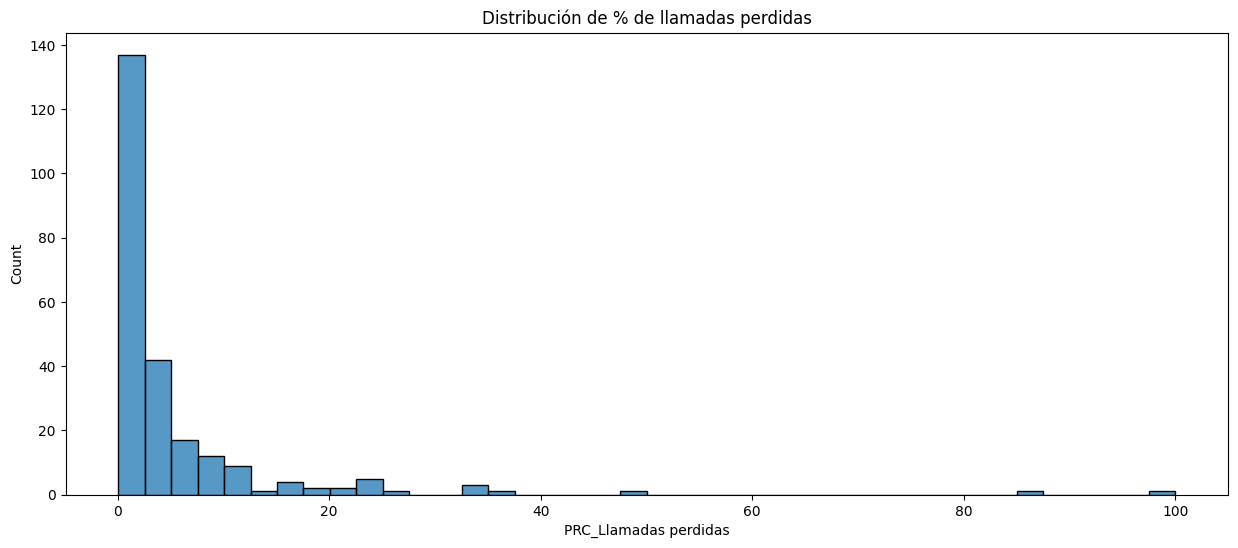

In [ ]:
plt.figure (figsize = (15, 6))
sns.histplot(
    data = tabla_llamadas_por_operador,
    x = 'PRC_Llamadas perdidas',
    bins = 40

)
plt.title('Distribución de % de llamadas perdidas')
plt.show()

Tras preparar y depurar los datos, se realizó un análisis enfocado en el desempeño de los operadores a partir de las llamadas entrantes, considerando tanto el volumen total de llamadas como las llamadas perdidas. Para ello, se excluyeron registros sin operador asignado y se trabajó únicamente con llamadas entrantes, ya que estas son las más relevantes para evaluar la calidad del servicio.

Se calcularon, para cada operador, el número total de llamadas entrantes, el número total de llamadas entrantes perdidas y la proporción de llamadas perdidas respecto al total, expresada como porcentaje. Este enfoque permitió normalizar el desempeño de los operadores y evitar conclusiones basadas únicamente en volúmenes absolutos de llamadas.

El análisis de la distribución del porcentaje de llamadas perdidas mostró que la mayoría de los operadores presenta tasas bajas de llamadas perdidas, concentrándose en valores cercanos a cero. Sin embargo, se identificó una distribución sesgada a la derecha, con un grupo reducido de operadores que exhiben porcentajes significativamente más altos, actuando como valores atípicos dentro del conjunto de datos.

Estos resultados indican que, aunque el sistema en general mantiene un desempeño adecuado, existen operadores cuyo comportamiento difiere notablemente del patrón general y que podrían estar contribuyendo de manera desproporcionada a la pérdida de llamadas entrantes. Esta observación justifica la necesidad de definir un umbral objetivo para clasificar a los operadores con desempeño ineficaz en las siguientes etapas del análisis.

Dado que la mayoría de los operadores presenta tasas bajas de llamadas perdidas y que los valores superiores al 35% se encuentran claramente fuera del comportamiento normal observado, se estableció este porcentaje como umbral para identificar operadores con desempeño ineficaz.

In [ ]:
tabla_llamadas_por_operador['Operadores_ineficaces'] = (tabla_llamadas_por_operador['PRC_Llamadas perdidas'] >= 35).astype(int)

In [ ]:
tabla_llamadas_por_operador.head()

,Operador,Llamadas,Llamadas perdidas,PRC_Llamadas perdidas,Operadores_ineficaces
0,882680.0,109,3,2.75,0
1,882684.0,643,4,0.62,0
2,882686.0,837,6,0.72,0
3,882690.0,176,2,1.14,0
4,884408.0,41,4,9.76,0


In [ ]:
llamadas_entrantes ['Tiempo de espera']= (llamadas_entrantes['total_call_duration'] - llamadas_entrantes['call_duration'])
print(llamadas_entrantes['Tiempo de espera'].sort_values(ascending=True))

41012       0
40910       0
49225       0
40893       0
40888       0
         ... 
35004    2217
28950    3200
28943    3495
28939    3725
38359    3998
Name: Tiempo de espera, Length: 14013, dtype: int64


In [ ]:
tiempo_de_espera_por_operador = llamadas_entrantes.groupby('operator_id')['Tiempo de espera'].mean().reset_index()

In [ ]:
tiempo_de_espera_por_operador.columns = ['Operador', 'Tiempo promedio de espera']
tiempo_de_espera_por_operador['Tiempo promedio de espera'] = round(tiempo_de_espera_por_operador['Tiempo promedio de espera'], 2)
tiempo_de_espera_por_operador.head()

,Operador,Tiempo promedio de espera
0,879896.0,26.91
1,879898.0,28.20
2,880020.0,7.25
3,880022.0,14.00
4,880026.0,7.89


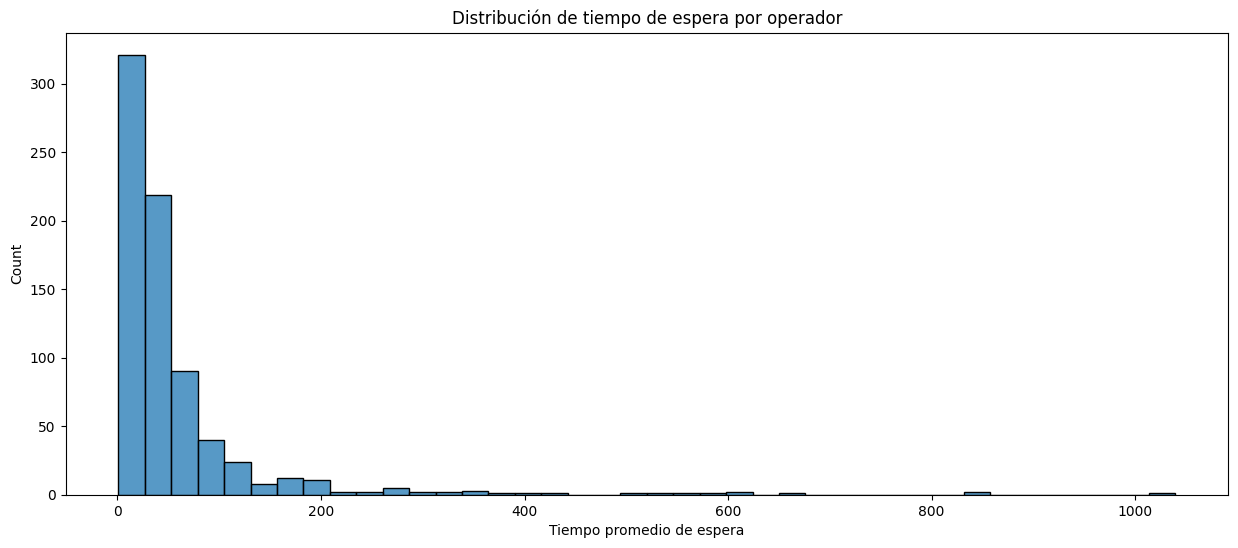

In [ ]:
plt.figure(figsize = (15, 6))
sns.histplot(
    data = tiempo_de_espera_por_operador,
    x = 'Tiempo promedio de espera',
    bins = 40
)
plt.title('Distribución de tiempo de espera por operador')
plt.show()

El umbral de 200 segundos de tiempo promedio de espera fue definido tras analizar la distribución de los datos, observando que la mayoría de los operadores presenta tiempos significativamente menores, mientras que valores superiores a este punto corresponden a un grupo reducido con desempeño atípico y potencial impacto negativo en la experiencia del cliente.

In [ ]:
tiempo_de_espera_por_operador ['Operador ineficaz por tiempo de espera'] = (tiempo_de_espera_por_operador['Tiempo promedio de espera'] >= 200).astype(int)

In [ ]:
tiempo_de_espera_por_operador.head()

,Operador,Tiempo promedio de espera,Operador ineficaz por tiempo de espera
0,879896.0,26.91,0
1,879898.0,28.20,0
2,880020.0,7.25,0
3,880022.0,14.00,0
4,880026.0,7.89,0


In [ ]:
tabla_ineficacia = pd.merge(tabla_llamadas_por_operador, tiempo_de_espera_por_operador, how='inner')
print(tabla_ineficacia.head(10))

   Operador  Llamadas  Llamadas perdidas  PRC_Llamadas perdidas  \
0  882680.0       109                  3                   2.75   
1  882684.0       643                  4                   0.62   
2  882686.0       837                  6                   0.72   
3  882690.0       176                  2                   1.14   
4  884408.0        41                  4                   9.76   
5  885876.0      1152                 24                   2.08   
6  885890.0      1363                 27                   1.98   
7  887276.0       458                  3                   0.66   
8  888406.0         9                  1                  11.11   
9  888532.0        12                  2                  16.67   

   Operadores_ineficaces  Tiempo promedio de espera  \
0                      0                      37.11   
1                      0                     191.73   
2                      0                     169.94   
3                      0                  

Se realizó un análisis exploratorio de los datos de llamadas del servicio CallMeMaybe con el objetivo de identificar operadores con desempeño ineficaz. El análisis se enfocó en llamadas entrantes, ya que estas son críticas para la experiencia del cliente. Primero, se depuraron los datos eliminando registros sin operador asignado y se agregaron las métricas a nivel operador para evitar sesgos por volumen de llamadas.

Como primer criterio de ineficacia, se calculó el porcentaje de llamadas entrantes perdidas por operador. El análisis de su distribución mostró que la mayoría de los operadores presenta tasas bajas de llamadas perdidas, mientras que un grupo reducido se ubica claramente en la cola de la distribución. Con base en este comportamiento y en un criterio de negocio, se estableció un umbral del 35% para identificar operadores con un nivel inaceptable de llamadas perdidas.

Como segundo criterio, se analizó el tiempo promedio de espera de las llamadas entrantes, calculado como la diferencia entre la duración total de la llamada y la duración efectiva de la conversación. La distribución de esta métrica evidenció nuevamente una concentración de valores bajos y la presencia de valores atípicos con tiempos excesivos. Por ello, se definió un umbral de 200 segundos como límite para considerar un desempeño ineficaz por tiempo de espera.

Finalmente, ambos criterios fueron combinados mediante una regla lógica inclusiva (OR), considerando a un operador como ineficaz si cumplía al menos uno de los dos criterios definidos. Como resultado, se identificó un subconjunto reducido de operadores con desempeño ineficaz, lo que permite enfocar acciones correctivas de manera específica sin penalizar al resto del equipo.

In [ ]:
llamadas_salientes = telecom_1[telecom_1['direction'] == 'out'].copy()

In [ ]:
llamadas_salientes_por_operador = llamadas_salientes.groupby('operator_id')['calls_count'].sum().reset_index()
llamadas_salientes_por_operador.columns = ['Operador', 'Llamadas hechas']
print(llamadas_salientes_por_operador.head())

   Operador  Llamadas hechas
0  879896.0             1071
1  879898.0             7856
2  880020.0               46
3  880022.0              211
4  880026.0             2414


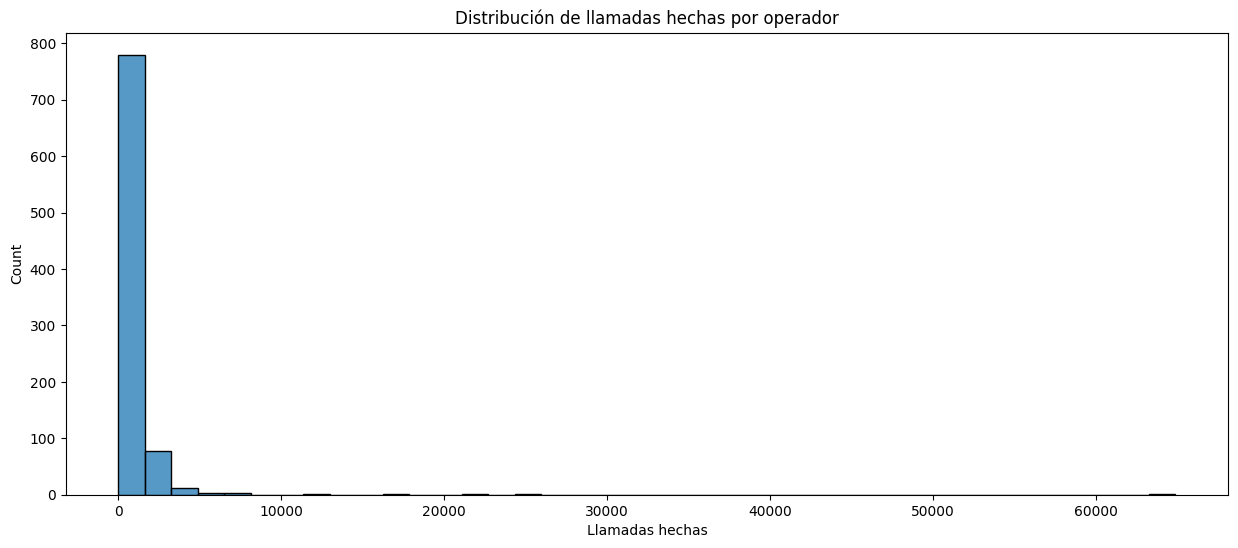

In [ ]:
plt.figure(figsize = (15, 6))
sns.histplot(
    data = llamadas_salientes_por_operador,
    x = 'Llamadas hechas',
    bins = 40
)
plt.title('Distribución de llamadas hechas por operador')
plt.show()

In [ ]:
mas_de_una_llamada = llamadas_salientes_por_operador[llamadas_salientes_por_operador['Llamadas hechas'] > 0].copy()

In [ ]:
mas_de_una_llamada.sort_values(by='Llamadas hechas')

,Operador,Llamadas hechas
544,937716.0,1
841,963716.0,1
297,914440.0,1
298,914626.0,1
710,946072.0,1
...,...,...
255,908640.0,16699
446,925922.0,21754
466,929428.0,24572
25,885890.0,64653


In [ ]:
mas_de_una_llamada['Ineficacia por llamadas hechas'] = (mas_de_una_llamada['Llamadas hechas'] < 50).astype(int)

In [ ]:
mas_de_una_llamada.head()

,Operador,Llamadas hechas,Ineficacia por llamadas hechas
0,879896.0,1071,0
1,879898.0,7856,0
2,880020.0,46,1
3,880022.0,211,0
4,880026.0,2414,0


In [ ]:
tabla_ineficacia_final = pd.merge(tabla_ineficacia, mas_de_una_llamada, how = 'inner')
tabla_ineficacia_final.head()

,Operador,Llamadas,Llamadas perdidas,PRC_Llamadas perdidas,Operadores_ineficaces,Tiempo promedio de espera,Operador ineficaz por tiempo de espera,Llamadas hechas,Ineficacia por llamadas hechas
0,882684.0,643,4,0.62,0,191.73,0,721,0
1,882686.0,837,6,0.72,0,169.94,0,3094,0
2,882690.0,176,2,1.14,0,299.83,1,1590,0
3,884408.0,41,4,9.76,0,67.12,0,25,1
4,885876.0,1152,24,2.08,0,101.94,0,64897,0


In [ ]:
tabla_ineficacia_final['ineficaz_final'] = (
    (tabla_ineficacia_final['Operadores_ineficaces'] == 1) |
    (tabla_ineficacia_final['Operador ineficaz por tiempo de espera'] == 1) |
    (tabla_ineficacia_final['Ineficacia por llamadas hechas'] == 1)
).astype(int)

In [ ]:
tabla_ineficacia_final

,Operador,Llamadas,Llamadas perdidas,PRC_Llamadas perdidas,Operadores_ineficaces,Tiempo promedio de espera,Operador ineficaz por tiempo de espera,Llamadas hechas,Ineficacia por llamadas hechas,ineficaz_final
0,882684.0,643,4,0.62,0,191.73,0,721,0,0
1,882686.0,837,6,0.72,0,169.94,0,3094,0,0
2,882690.0,176,2,1.14,0,299.83,1,1590,0,1
3,884408.0,41,4,9.76,0,67.12,0,25,1,1
4,885876.0,1152,24,2.08,0,101.94,0,64897,0,0
...,...,...,...,...,...,...,...,...,...,...
193,959312.0,58,7,12.07,0,31.07,0,156,0,0
194,960620.0,79,1,1.27,0,87.15,0,64,0,0
195,964510.0,16,2,12.50,0,24.00,0,143,0,0
196,964666.0,45,3,6.67,0,60.90,0,875,0,0


In [ ]:
tabla_ineficacia_final['ineficaz_final'].value_counts()

0    136
1     62
Name: ineficaz_final, dtype: int64

In [ ]:
from scipy import stats

In [ ]:
eficaz = tabla_ineficacia_final[
    tabla_ineficacia_final['ineficaz_final'] == 0
]

ineficaz = tabla_ineficacia_final[
    tabla_ineficacia_final['ineficaz_final'] == 1
]

In [ ]:
len(eficaz)

136

In [ ]:
len(ineficaz)

62

In [ ]:
U, p_value = stats.mannwhitneyu(
    eficaz["Tiempo promedio de espera"],
    ineficaz["Tiempo promedio de espera"],
    alternative="two-sided"
)

U, p_value

(3708.5, 0.17515160065191349)

Se aplicó una prueba Mann–Whitney U para comparar el tiempo promedio de espera entre operadores eficaces e ineficaces, definidos a partir del criterio final de ineficacia.

El resultado arrojó un valor p = 0.175.

Dado que p es mayor que el nivel de significancia α = 0.05, no se rechaza la hipótesis nula.

Por lo tanto, no se encontró evidencia estadísticamente significativa de una diferencia en el tiempo promedio de espera entre ambos grupos.

In [ ]:
U, p_value = stats.mannwhitneyu(
    eficaz["PRC_Llamadas perdidas"],
    ineficaz["PRC_Llamadas perdidas"],
    alternative="two-sided"
)

U, p_value

(3642.5, 0.12542910598840437)

Se aplicó una prueba Mann–Whitney U para comparar el porcentaje de llamadas entrantes perdidas entre operadores eficaces e ineficaces.

El análisis arrojó un valor p = 0.125.

Dado que p es mayor que el nivel de significancia α = 0.05, no se rechaza la hipótesis nula.

Por lo tanto, no se encontró evidencia estadísticamente significativa de una diferencia en el porcentaje de llamadas perdidas entre ambos grupos.

In [ ]:
U, p_value = stats.mannwhitneyu(
    eficaz["Llamadas hechas"],
    ineficaz["Llamadas hechas"],
    alternative="two-sided"
)

U, p_value

(7251.0, 4.852138711892643e-16)

Se aplicó una prueba Mann–Whitney U para comparar el número de llamadas salientes entre operadores eficaces e ineficaces.

El análisis arrojó un valor p ≈ 4.85 × 10⁻¹⁶.

Dado que p es considerablemente menor que el nivel de significancia α = 0.05, se rechaza la hipótesis nula.

Por lo tanto, se concluye que existe una diferencia estadísticamente significativa en el número de llamadas salientes entre ambos grupos.

Dos de los criterios (espera y llamadas perdidas) no presentan diferencias significativas en promedio, lo que indica que la ineficacia no se explica únicamente por valores medios, sino por casos específicos o extremos.

En contraste, el número de llamadas salientes sí muestra una diferencia clara y consistente entre operadores eficaces e ineficaces, validando este criterio como un factor clave de desempeño.

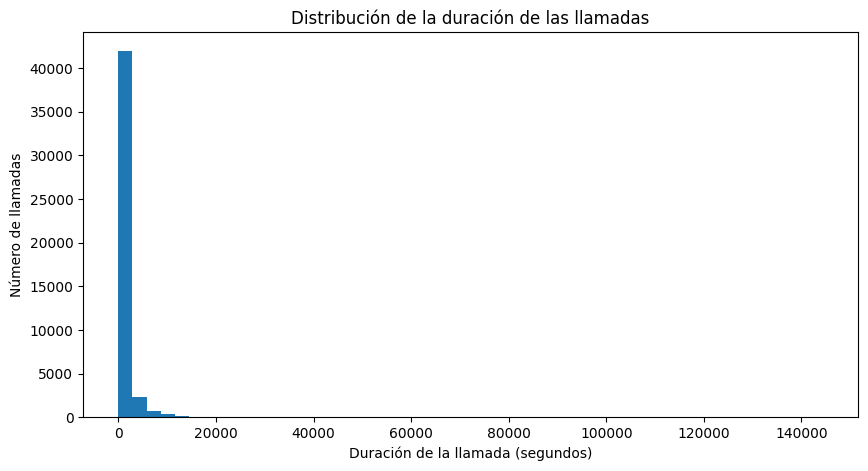

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(telecom_1["call_duration"], bins=50)
plt.xlabel("Duración de la llamada (segundos)")
plt.ylabel("Número de llamadas")
plt.title("Distribución de la duración de las llamadas")
plt.show()

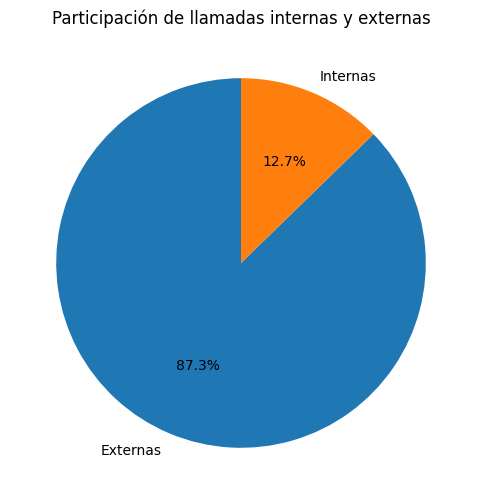

In [ ]:
internal_counts = telecom_1["internal"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    internal_counts,
    labels=["Externas", "Internas"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Participación de llamadas internas y externas")
plt.show()

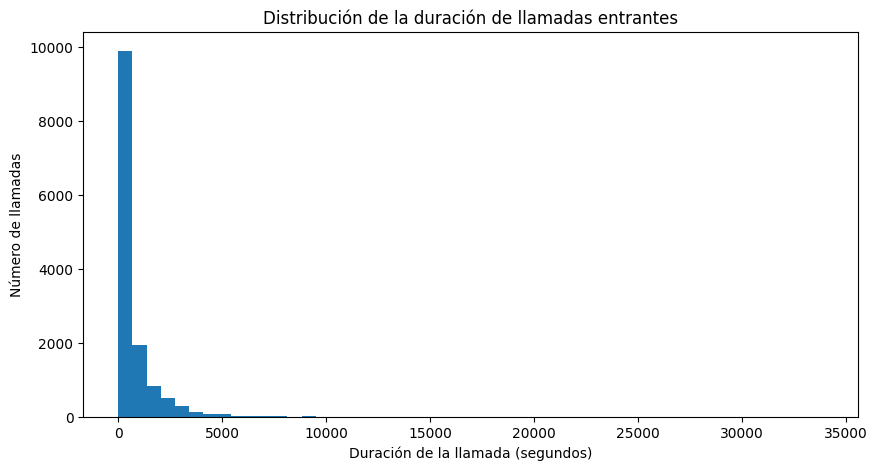

In [ ]:
calls_in = telecom_1[telecom_1["direction"] == "in"]

plt.figure(figsize=(10, 5))
plt.hist(calls_in["call_duration"], bins=50)
plt.xlabel("Duración de la llamada (segundos)")
plt.ylabel("Número de llamadas")
plt.title("Distribución de la duración de llamadas entrantes")
plt.show()

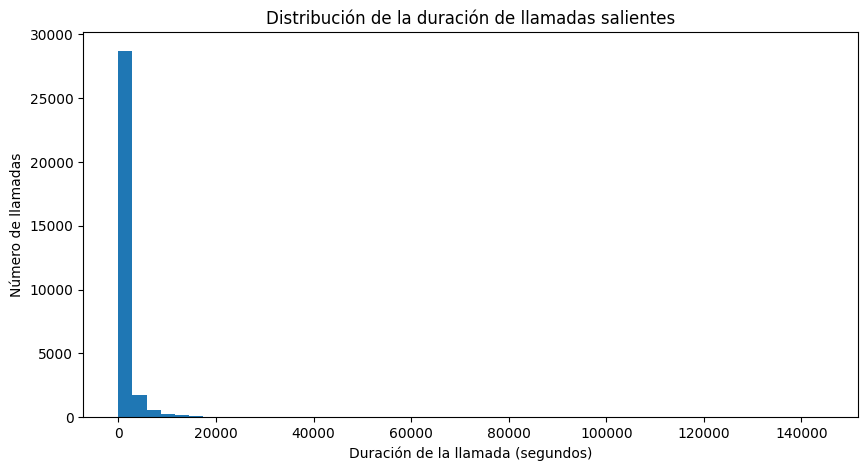

In [ ]:
calls_out = telecom_1[telecom_1["direction"] == "out"]

plt.figure(figsize=(10, 5))
plt.hist(calls_out["call_duration"], bins=50)
plt.xlabel("Duración de la llamada (segundos)")
plt.ylabel("Número de llamadas")
plt.title("Distribución de la duración de llamadas salientes")
plt.show()

Como parte de la conclusión me gustaría agregar que los parámetros que se utilizaron en la tabla final para saber si alguien calificaba como eficaz o ineficaz fueron numeros binarios, siendo el 0 el equivalente a efizar y el 1 era el equivalente a ineficaz.

Para evaluar si existían diferencias estadísticamente significativas entre operadores eficaces e ineficaces, se realizaron pruebas de hipótesis utilizando la prueba no paramétrica Mann–Whitney U, comparando ambos grupos en cada una de las métricas analizadas.

En el caso del tiempo promedio de espera, no se encontraron diferencias estadísticamente significativas entre operadores eficaces e ineficaces (p > 0.05). Esto indica que, en promedio, el tiempo de espera no distingue claramente a ambos grupos.

De manera similar, el porcentaje de llamadas entrantes perdidas tampoco presentó diferencias estadísticamente significativas entre operadores eficaces e ineficaces (p > 0.05), lo que sugiere que esta métrica no se manifiesta de forma uniforme cuando se analizan los promedios por operador.

En contraste, el número de llamadas salientes sí mostró una diferencia estadísticamente significativa entre ambos grupos (p < 0.05). Los operadores clasificados como ineficaces realizan significativamente menos llamadas salientes que los operadores eficaces, lo que valida este criterio como un factor clave para identificar ineficiencia operativa.

Interpretación de negocio:

Los resultados indican que la ineficacia de los operadores no se explica únicamente por métricas promedio como el tiempo de espera o el porcentaje de llamadas perdidas, sino que puede estar relacionada con casos extremos o combinaciones de criterios.
Sin embargo, el número de llamadas salientes emerge como el indicador más consistente y estadísticamente robusto para diferenciar el desempeño de los operadores.

Desde una perspectiva de negocio, este hallazgo sugiere que los operadores ineficaces presentan una menor actividad o productividad, lo cual puede afectar el desempeño general del servicio y la capacidad de atención a los clientes.

Recomendaciones:

Con base en el análisis realizado, se recomienda:

Priorizar el monitoreo del número de llamadas salientes como una métrica clave de desempeño operativo.

Utilizar los criterios definidos como un sistema de alerta temprana, enfocado en la mejora continua y no únicamente en medidas correctivas.

Complementar este análisis con métricas adicionales, como calidad de atención o satisfacción del cliente, para obtener una visión más integral del desempeño de los operadores.

Revisar y ajustar periódicamente los umbrales establecidos conforme cambien el volumen y las características del tráfico de llamadas.

En conclusión, el enfoque propuesto permite identificar operadores ineficaces de manera objetiva y basada en datos, apoyando a los supervisores en la toma de decisiones operativas y contribuyendo a mejorar la eficiencia general del servicio de telefonía.